<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/modelo_inhibicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Modelo 6 (Inhibición)

Nombre: JM

Fecha: Enero 2021

# Modelado de ecuaciones

El modelo dinámico se desarrolla escribiendo balances de materiales en la biomasa (células) y el sustrato (fuente de alimentación para celss). La biomasa crece alimentándose del sustrato.

## Balance de materia  (biomasa)

Escribimos el balance de materia de biomasa como:

$$rate\ of\ accumulation\ =\ in\ by\ flow\ -\ out\ by\ flow\ +\ generation$$

<a id='equation-la-se2'></a>
$$
\frac{d(Vx)}{dt} = F_{in}x_{f} - Fx + V r_1 \tag{1}
$$


where $x_f$ is the concentration of biomass in the feed stream and $F$ is the volumetric flowrate.

## Balance de materia (sustrato)

$$rate\ of\ accumulation\ =\ in\ by\ flow\ -\ out\ by\ flow\ \ consumption$$

<a id='equation-la-se2'></a>

$$
\frac{d(Vs)}{dt} = F_{in}s_{f} - Fs + V r_2 \tag{2}
$$

where $s_f$ is the concentration of substrate in the feed stream


# Tasa de crecimiento específica

La velocidad de reacción (masa de células generadas / tiempo de volumen) se escribe normalmente a continuación de. 

<a id = 'equation-la-se2'></a>
$$
r_1 = \mu x \tag{3}
$$

donde $ \mu $ es el coeficiente de tasa de crecimiento específico. Podemos pensar en $ \mu $ como algo similar a una constante de velocidad de reacción de primer orden; sin embargo, $ \mu $ no es constante, es una función de la concentración de sustrato. Las unidades de $ \mu $ son $ time^{- 1} $.

# Rendimiento

Existe una relación entre la tasa de generación de biomasa y la tasa de consumo de sustrato. Defina $Y$ como el rendimiento, es decir, la masa de células producidas por masa de sustrato consumido. 

<a id = 'equation-la-se2'></a>
$$
Y = \frac{mass\ of\ cells\ produced}{mass\ of\ substrate\ consumed} = \frac{r_1}{r_2} \tag{4}
$$

from (4) we can write:

<a id = 'equation-la-se2'></a>
$$
r_2 =  \frac{r_1}{Y}\tag{5}
$$

<a id = 'equation-la-se2'></a>
$$
r_2 =  \frac{\mu x}{Y}\tag{6}
$$

asumimos en el análisis posterior que $Y$ es constante

# Tasa de dilución

Suponiendo un reactor de volumen constante, podemos escribir (1) y (2) como

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =  \frac{F_{in}}{V}x_f - \frac{F}{V}x + r_1  \tag{7}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  \frac{F_{in}}{V}s_f - \frac{F}{V}s - r_2  \tag{8}
$$

Definiendo $ F / V $ como $ D $, la tasa de dilución, y usando la expresión de tasa en (3) y (6) encontramos.

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =  Dx_f - Dx + \mu x  \tag{9}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  Ds_f - Ds - \frac{\mu x}{Y}  \tag{10}
$$

Generalmente, se supone que no hay biomasa en la corriente de alimentación, por lo que $ x_f = 0 $. Las ecuaciones de modelado del biorreactor normalmente se escriben de la siguiente forma:

<a id = 'equation-la-se2'></a>
$$
\frac{dx}{dt} =   (\mu-D) x  \tag{11}
$$

<a id = 'equation-la-se2'></a>
$$
\frac{ds}{dt} =  D(s_f - s) - \frac{\mu x}{Y}  \tag{12}
$$

La tasa de dilución (D) es la inversa del tiempo de residencia del reactor y tiene unidades de $tiempo^{- 1}$.

# Expresiones de tasa de crecimiento

El coeficiente de la tasa de crecimiento no suele ser constante. Se han desarrollado varias relaciones funcionales entre el coeficiente de tasa de crecimiento y la concentración de sustrato. Los más comunes son (i) Monod y (ii) Inhibición del sustrato.

### Monod

El coeficiente de la tasa de crecimiento a menudo varía de forma hiperbólica. Monod propuso lo siguiente en 1942. Observe que $ \ mu $ es de primer orden a $ s $ bajos y de orden cero a $ s $ altos.


<a id = 'equation-la-se2'></a>
$$
\mu = \frac{\mu_{max}s}{k_m + s} \tag{13}
$$

cuado s is baja: 

$$
\mu \approx \frac{\mu_{max}}{k_m}s
$$
cuando s es alta: 

$$
\mu \approx \mu_{max}
$$

Debido a que la velocidad de reacción es:

$$
r_1 = \mu x
$$

this means that the Monod description is similar to a second-order (biomolecular) reaction when $s$ is low, since 

$$
r_1 \approx \frac{\mu_{max}}{k_m} x
$$

and to a first-order reaction when $s$ is high, since 

$$
r_1 \approx \mu_{max} x
$$

La ecuación (13) tiene la misma forma que la isoterma de adsorción de Langmuir y la ecuación de velocidad estándar para reacciones catalizadas por enzimas con un solo sustrato.

### Inhibición por sustrato

A veces, el coeficiente de tasa de crecimiento aumenta con una concentración de sustrato baja, pero disminuye con una concentración de sustrato alta. Este efecto se llama inhibición del sustrato y está representado por la siguiente ecuación:

<a id = 'equation-la-se2'></a>
$$
\mu = \frac{\mu_{max}s}{k_m + s + k_I s^{2}} \tag{14}
$$

In [9]:
# cargar librerias 
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
# monod equation 
monod <- function(s) {

  mu = mu_max*s/(km + s)

  return(mu)
}

In [11]:
# substrate inhibition equation 
subinhib <- function(s) {

  mu = mu_max*s/(km + s + ki*s^2)

  return(mu)
}

In [12]:
# establish parameter values

# monod
mu_max <- 0.53 # hr^-1
km <- 0.12 # g/L
Y <- 0.4
sf <- 4.0 # g/L

# inhibition
mu_max <- 0.53 # h^-1
ks <- 0.12 # g/L
ki <- 0.4545 # g/L
sf <- 4.0 # g/L

In [13]:
s <- seq(0,5,len=100)
mu_mod <- monod(s)
mu_inh <- subinhib(s)
data <- data.frame(s = s, monod = mu_mod, inhibition = mu_inh)


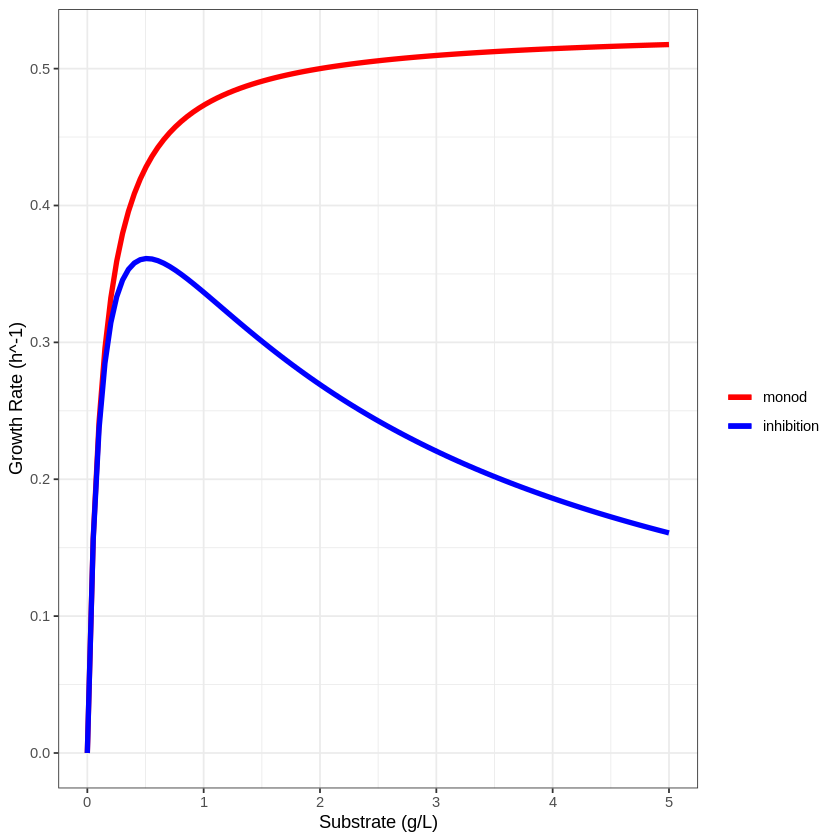

In [14]:
ggplot(data,aes(s)) +
  geom_line(aes(y=monod, color = "monod"), lwd = 1.5) +
  geom_line(aes(y=inhibition, color = "inhibition"), lwd = 1.5) +
  scale_color_manual("", breaks = c("monod", "inhibition"),
                          values = c("red","blue")) +
  xlab("Substrate (g/L)") +
  ylab("Growth Rate (h^-1)") +
  theme_bw()

Figura 2. Comparación de modelos de inhibición Monod y Substrate para la tasa de crecimiento.

| Monod | Inhibición por sustrato |
| :------- | :----: | 
| $\mu_{max}$ = 0.53 $h^{-1}$ | $\mu_{max}$ = 0.53 $h^{-1}$ |
| $k_s$ = 0.12 g/L | $k_m$ = 0.12 g/L | 
| Y = 0.4 | $k_I$ = 0.4545 L/g  |
| $s_f$ = 4.0 g/L | $s_f$ = 4.0 g/L |

Observe que la ecuación de Monod es un caso especial de (14), con $ k_I = 0 $

# Análisis de estabilidad  modelo inhibición por sustrto 

Describir los puntos de equilibrio, explicar cómo los obtienen, y si esperan/observan bifurcaciones. Incluir código comentado o procedimiento algebraico. 

En las siguiente secciones se describen con detalle los puntos de equilibrio así como su dependencia con respecto a los parámetros del modelo. Sin embargo, aquí se muestran los dos puntos de equilibrio que se encontraron:

$$\frac{ds}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm} D(s_{f} - s) - r_{2} = 0  \hspace{1cm}  (1)$$
$$\frac{dx}{dt} = 0 \hspace{1cm}  \rightarrow \hspace{1cm}  r_{1} - Dx = 0 \hspace{1cm} (2)$$

Resolviendo la ecuación 1 y 2 para las variables $s$ y $x$, se obtienes los siguientes puntos de equilibrio:



$$P_{1}: \hspace{1cm} \bar{s} = s_{f}, \hspace{0.25cm} \bar{x} = 0$$ \

$$P_{2}: \hspace{1cm} \bar{s} = \frac{-(1- \frac{\mu}{D}) - \sqrt{(1-\frac{\mu}{D})^2 - 4 k_I k_M}}{2k_I}, \hspace{0.25cm} \bar{x} = \frac{D y (s_f - s_{ss})}{\mu}$$ \

$$P_{3}: \hspace{1cm} \bar{s} = \frac{-(1- \frac{\mu}{D}) + \sqrt{(1-\frac{\mu}{D})^2 - 4 k_I k_M}}{2k_I}, \hspace{0.25cm} \bar{x} = \frac{D y (s_f - s_{ss})}{\mu}$$

Puntos de equilibrio obtenidos con Python.

https://github.com/JuanM-GG/sistemas-dinamicos-Python/blob/main/steady_state_inhibition.ipynb

In [140]:
# cargar Grind.R
install.packages("rootSolve")
install.packages("FME")
source("Grind.R")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



grind.R was sourced


In [169]:
model <- function(times, state, parms) {
  with(as.list(c(state, parms)), {

    # velocidad de crecimiento 
    r1 = mu*s/(km + s + ki*s^2)*x

    # balances de especies
    ds = -(1/y)*r1 + D*(sf - s)
    dx = r1 - D*x

    return(list(c(ds,dx))) 
  })
}

In [162]:
# establecer parámetros 
p <- c(mu = 1.2, km = 180, ki = 10, y = 0.2, sf = 40, D = 0.009)

In [163]:
# condiciones iniciales
s <- c(s = 10, x = 0.1)

In [165]:
# función para calcular los puntos de equilibrio
steady_state <- function(p) {
        with(as.list(p), {
                
                # Primer punto de equilibrio
                s1 = sf
                x1 = 0
                ss1 = c(s = s1, x = x1)
                
                # segundo punto de equilibrio
                s2 = (-(1-mu/D) - sqrt((1-mu/D)^2 - 4*ki*km))/(2*ki)
                x2 = y*(sf - s2)
                ss2 = c(s = s2, x = x2)
                
                # segundo punto de equilibrio
                s3 = (-(1-mu/D) + sqrt((1-mu/D)^2 - 4*ki*km))/(2*ki)
                x3 = y*(sf - s3)
                ss3 = c(s = s3, x = x3)
                
                
                return(list(ss1 = round(ss1, 3),ss2 = round(ss2, 3), ss3 = round(ss3, 3)))
        })
}

¿Cuáles son los puntos de equilibrio para el valor de los parámetros que hemos establecido?

In [166]:
steady_state(p)

$ss1
 s  x 
40  0 

$ss2
    s     x 
1.539 7.692 

$ss3
     s      x 
11.694  5.661

Para ver los puntos de equilibrio en un plano de fase, junto con las ceroclinas, usamos la función *plane* y la función *newton*

       s        x 
1.539238 7.692152 
Stable point, eigenvalues:  -0.1712733 -0.009 


s        x 
1.539238 7.692152

        s         x 
11.693906  5.661219 
Unstable point, eigenvalues:  0.01659214 -0.009 


s         x 
11.693906  5.661219

 s  x 
40  0 
Stable point, eigenvalues:  -0.009 -0.006040691 


s  x 
40  0

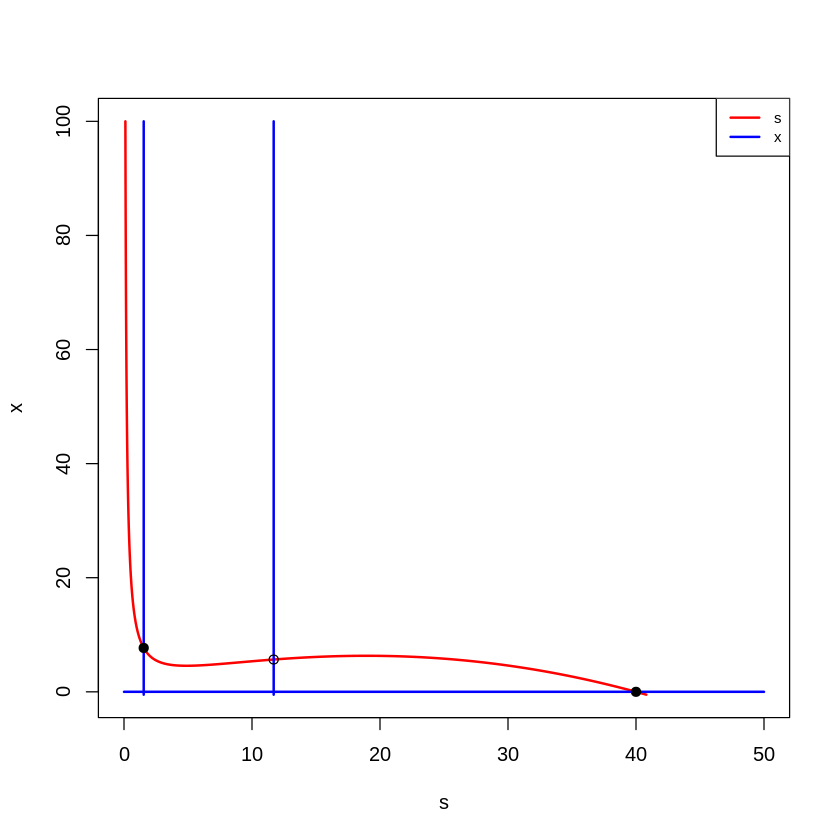

In [174]:
plane(xmin = 0, xmax = 50, ymin = -0.5, ymax = 100)
newton(state = c(s = 2, x = 10), plot = T)
newton(state = c(s = 12, x = 5), plot = T)
newton(state = c(s = 40, x = 0), plot = T)

De acuerdo con la la salida anterior. El punto de equilibrio *ss1* es inestable, mientras que el punto de equilibrio *ss2* es estable.  

### Efecto del parámetro D sobre el punto de equilibrio

       s        x 
1.360201 7.727960 
Stable point, eigenvalues:  -0.2537492 -0.009 
       s        x 
1.360202 7.727960 
Stable point, eigenvalues:  -0.2537492 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  0.2091818 -0.009 


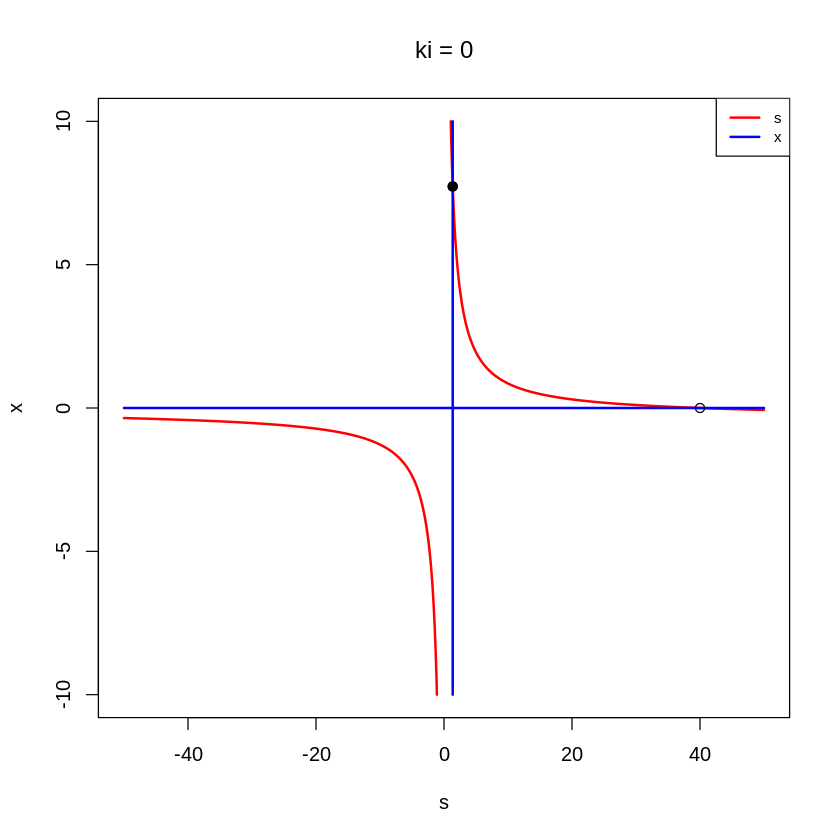

       s        x 
1.360341 7.727932 
Stable point, eigenvalues:  -0.25367 -0.009 
       s        x 
1.360341 7.727932 
Stable point, eigenvalues:  -0.25367 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  0.1943898 -0.009 


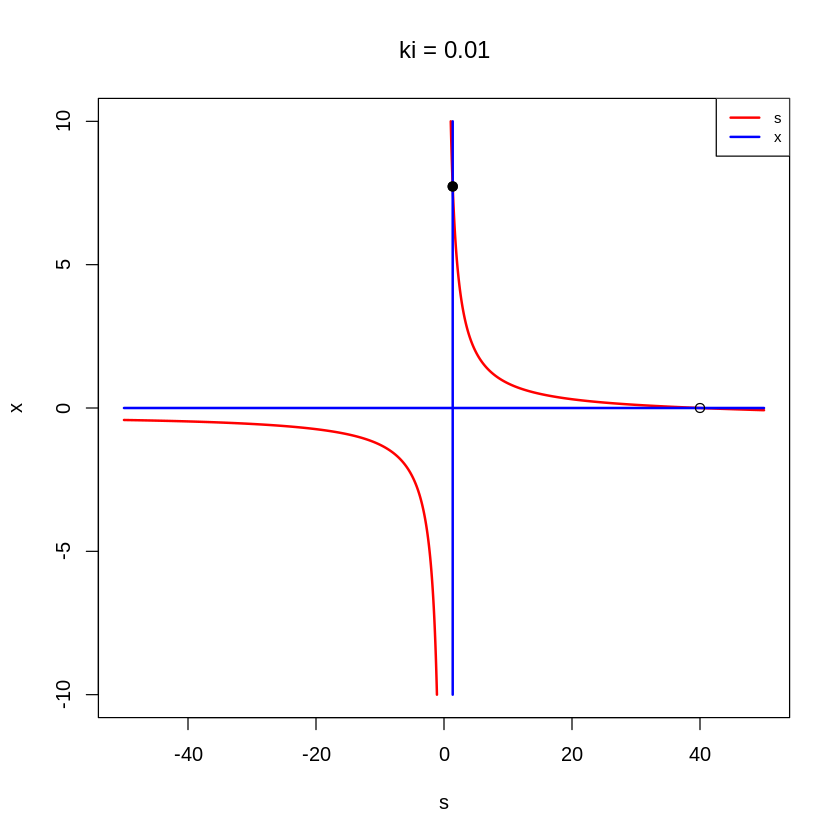

       s        x 
1.404949 7.719010 
Stable point, eigenvalues:  -0.2297517 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  -0.009 0.000561753 
         s          x 
42.7070120 -0.5414024 
Stable point, eigenvalues:  -0.009 -0.0005302838 


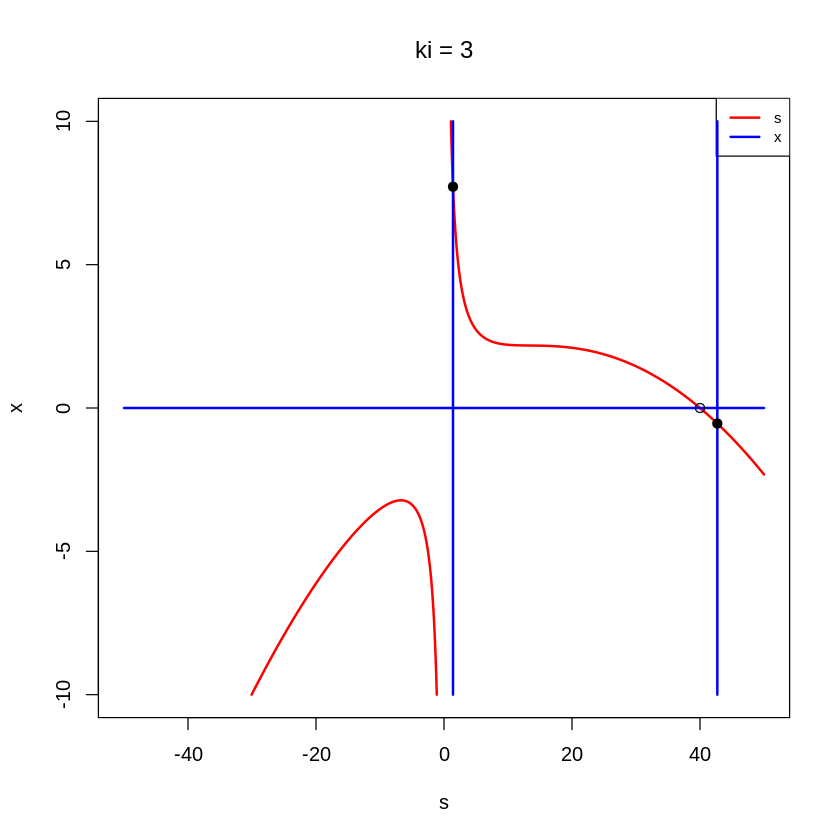

       s        x 
1.438372 7.712326 
Stable point, eigenvalues:  -0.2134442 -0.009 
        s         x 
25.027737  2.994453 
Unstable point, eigenvalues:  -0.009 0.004763088 
           s            x 
 4.00000e+01 -2.49844e-07 
Stable point, eigenvalues:  -0.009 -0.003160584 


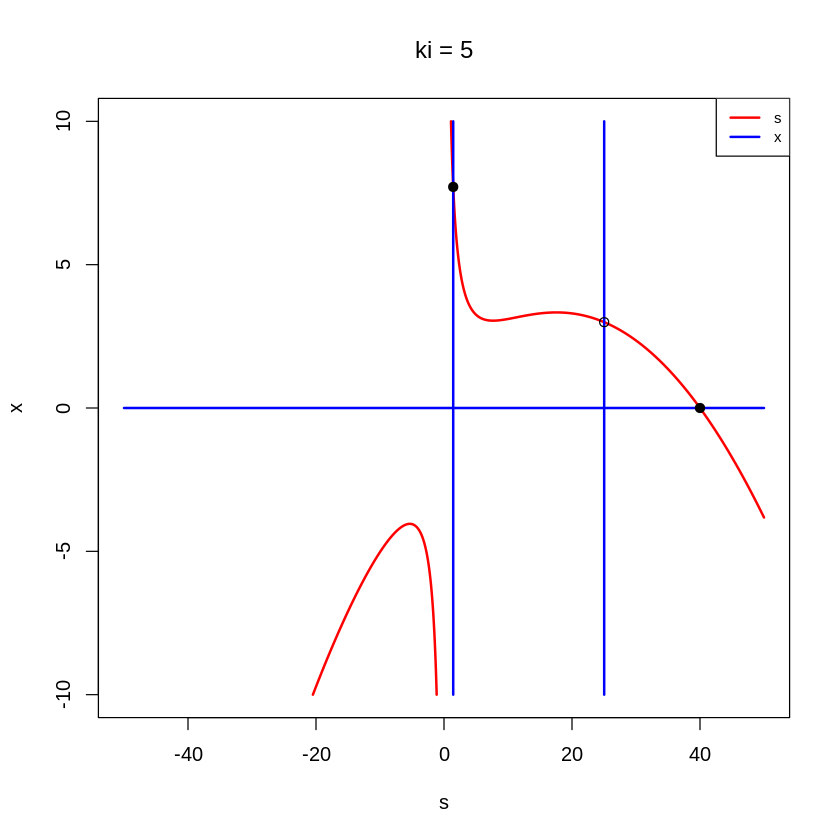

       s        x 
1.539238 7.692152 
Stable point, eigenvalues:  -0.1712733 -0.009 
        s         x 
11.694077  5.661185 
Unstable point, eigenvalues:  0.01659164 -0.009 
            s             x 
 4.000001e+01 -1.402445e-06 
Stable point, eigenvalues:  -0.009 -0.006040692 


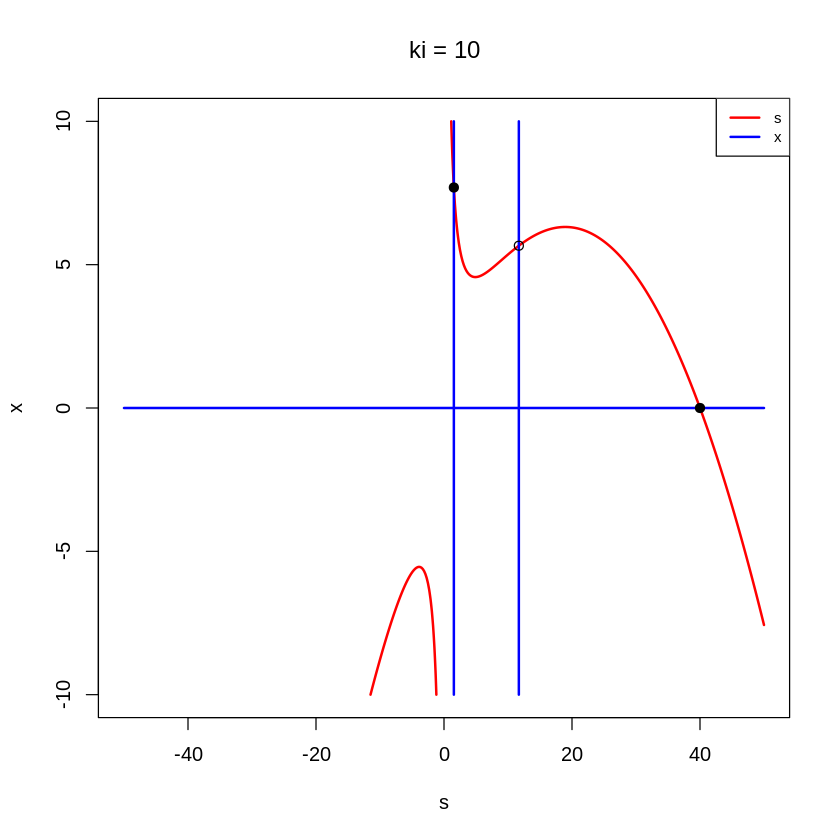

       s        x 
1.680183 7.663963 
Stable point, eigenvalues:  -0.1261251 -0.009 
       s        x 
7.141762 6.571648 
Unstable point, eigenvalues:  0.02544307 -0.009 
            s             x 
 4.000000e+01 -5.040774e-08 
Stable point, eigenvalues:  -0.009 -0.007018167 


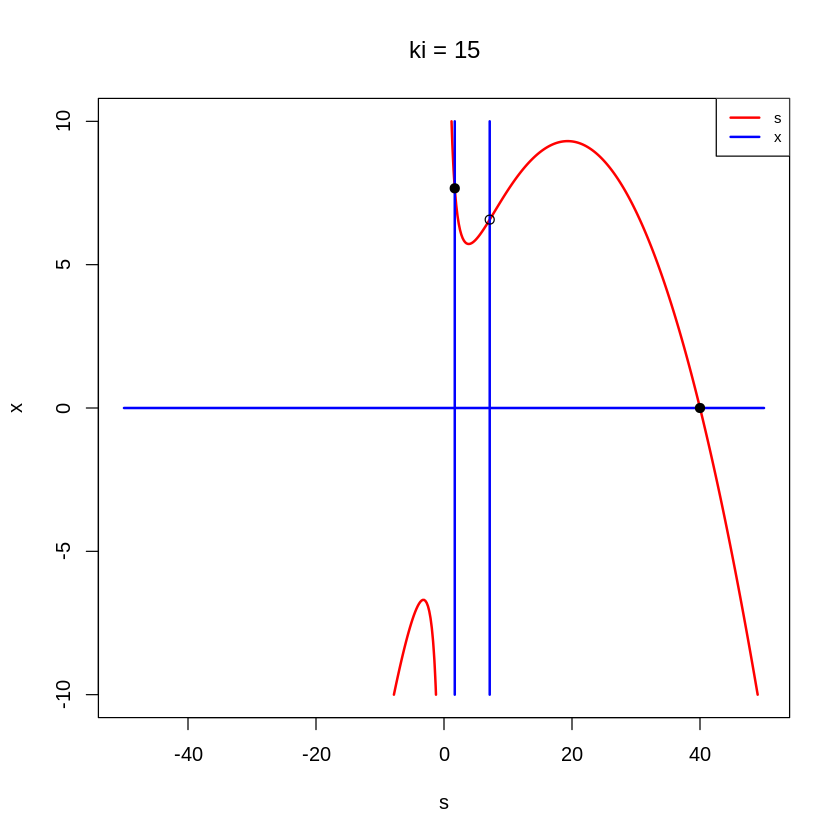

In [179]:
for (ki in c(0.0,0.01,3,5,10,15)) {

  p["ki"] <- ki
  plane(xmin = -50, xmax = 50, ymin = -10, ymax = 10, main = paste0("ki = ", ki))
  newton(state = c(s = 0, x = 10), plot = TRUE)
  newton(state = c(s = 8, x = 3), plot = TRUE)
  newton(state = c(s = 50, x = -5), plot = TRUE)
}
p["ki"] <- 0 # Regresar ki a su valor original

En la salida anterior vemos que al variar el valor del parámetro $D$ cambia el valor y la estabilidad de los puntos de equilibrio. Por ejemplo, al pasar de $D = 0.01$ a $D = 0.04$, el valor de $\bar{x}$ pasa de 0.8487 a 0.3779 (g/L), mientras que el valor de $\bar{s}$ pasa de 1.512 a 6.206 (g/L). Una primera observación de lo anterior es que el efecto de cambiar $D$ es mayor sobre $\bar{s}$ que sobre $\bar{x}$. Además, como la estabilidad de los puntos de equilibrio cambia, se espera observar bifurcaciones.  

### Diagrama de bifurcación 

       s        x 
1.404949 7.719010 
Stable point, eigenvalues:  -0.2297517 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  -0.009 0.000561753 
Starting at ki = 3 with:
       s        x 
1.404949 7.719010 
Starting at ki = 3 with:
 s  x 
40  0 
Bifurcation at ki = 3.2 
Bifurcation at ki = -0.2 
        s         x 
25.028293  2.994341 
Unstable point, eigenvalues:  -0.009 0.00476256 
Starting at ki = 5 with:
        s         x 
25.028293  2.994341 
Bifurcation at ki = -0.2 


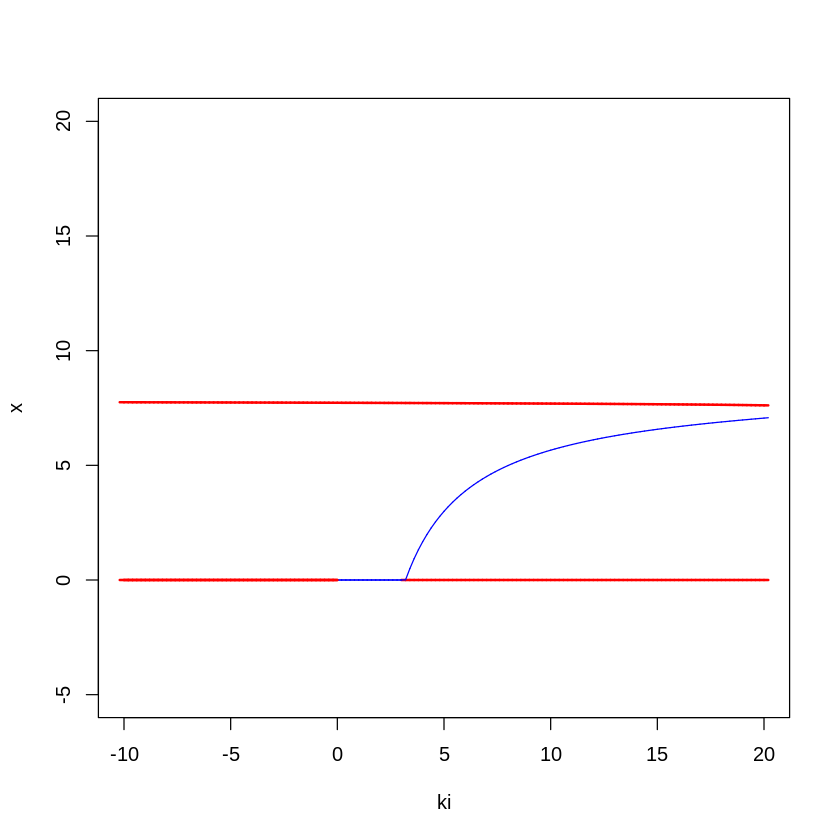

In [187]:
p["ki"] <- 3
ss1 <- newton(state = c(s = 0, x = 10))
ss2 <- newton(state = c(s = 8, x = 3))


continue(state = ss1, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -5, ymax = 20)

continue(state = ss2, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -5, ymax = 20, add = TRUE)

p["ki"] <- 5
ss3 <- newton(state = c(s = 20, x = 4))
continue(state = ss3, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "x", ymin = -5, ymax = 20, add = TRUE)
p["ki"] <- 0 # Regresar ki a su valor original

       s        x 
1.404949 7.719010 
Stable point, eigenvalues:  -0.2297517 -0.009 
 s  x 
40  0 
Unstable point, eigenvalues:  -0.009 0.000561753 
Starting at ki = 3 with:
       s        x 
1.404949 7.719010 
Starting at ki = 3 with:
 s  x 
40  0 
Bifurcation at ki = 3.2 
Bifurcation at ki = -0.2 
        s         x 
25.028293  2.994341 
Unstable point, eigenvalues:  -0.009 0.00476256 
Starting at ki = 5 with:
        s         x 
25.028293  2.994341 
Bifurcation at ki = -0.2 


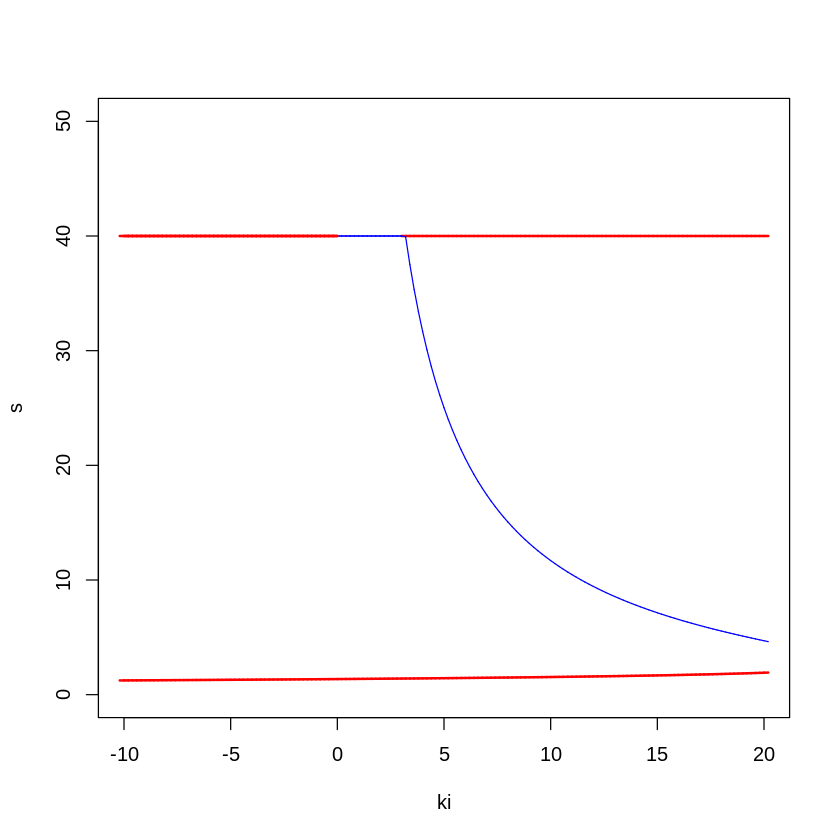

In [188]:
p["ki"] <- 3
ss1 <- newton(state = c(s = 0, x = 10))
ss2 <- newton(state = c(s = 8, x = 3))


continue(state = ss1, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 50)

continue(state = ss2, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 50, add = TRUE)

p["ki"] <- 5
ss3 <- newton(state = c(s = 20, x = 4))
continue(state = ss3, parms = p, odes = model, x = "ki", 
         step = 0.01, xmin = -10, xmax = 20, y = "s", ymin = 0, ymax = 50, add = TRUE)
p["ki"] <- 0 # Regresar ki a su valor original

# Restricciones en el punto de equilibrio 

Vemos que el punto de equilibrio 

$$P_{2}: \hspace{1cm} \bar{s} = \frac{Dk}{\mu - D}, \hspace{0.25cm} \bar{x} = \frac{y(Dk + s_{f}(D-\mu))}{D-\mu}$$

requiere que el valor de $D$ sea menor que $\mu$ para tener un valor positivo de sustrato en el equilibrio. Para entender esto podemos graficar la tasa de crecimiento y la tasa de dilución como función de la concentración de sustrato.

In [34]:
# función para graficar tasas de crecimiento y dilución 
rates <- function(p) {
  with(as.list(p), {

    s <- seq(0,1000,len=1000)
    # tasa de crecimiento 
    mu = mu*s/(k + s)

    # tasa de dilución 
    D = rep(D, length(s))

    data = data.frame(s=s,mu=mu,D=D)

    return(data)

  })
}

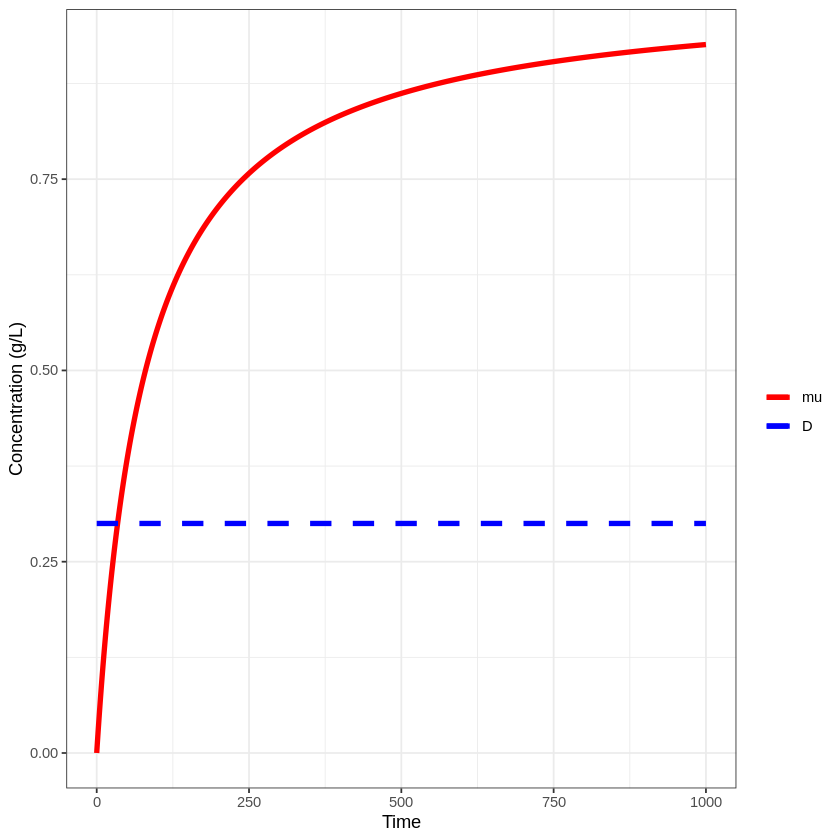

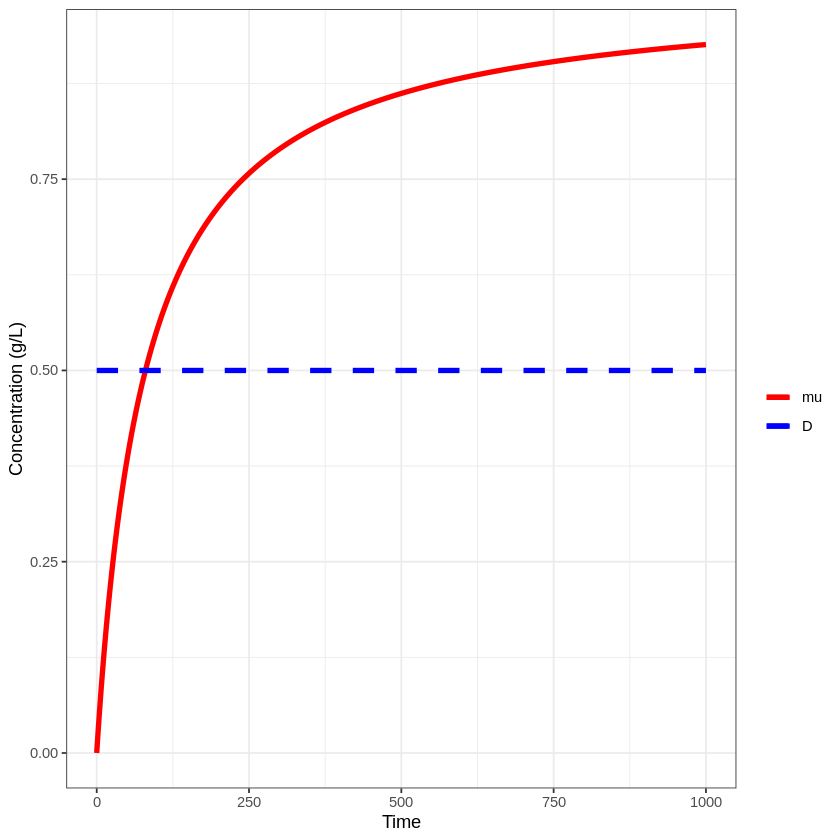

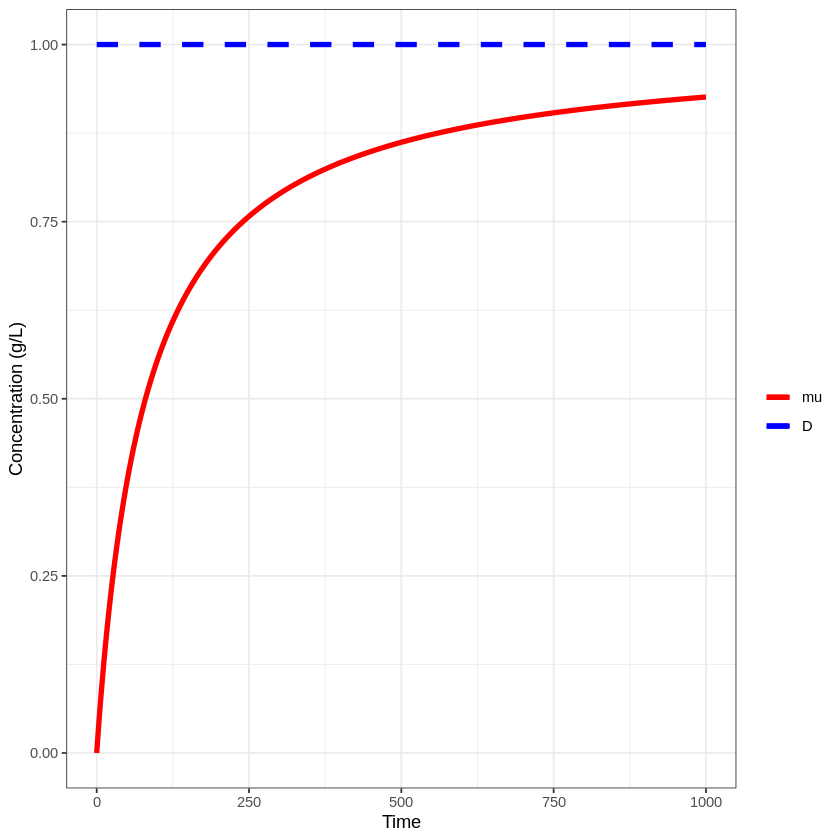

In [35]:
for (D in c(0.3,0.5,1)) {
  p <- c(mu = 1, k = 80, y = 0.1, D = D, sf = 10)
  data <- rates(p)
  # graficar tasas 
  print(
    ggplot(data,aes(s)) +
    geom_line(aes(y = mu, color = "mu"), lwd = 1.5) +
    geom_line(aes(y = D, color = "D"), lwd = 1.5, lty = 2) + 
    scale_color_manual("", breaks = c("mu","D"), values = c("red", "blue")) +
    xlab("Time") +
    ylab("Concentration (g/L)") +
    theme(title = paste0("D = ", D)) +
    theme_bw()
  )
}

Para que exista un equilibrion en la concentración de biomasa, es decir, $dx/dt = 0$, es necesarion que la tasa de crecimiento iguale a la tasa de dilución, pero como se puede observar en la salida anterior, si la tasa de dilución es demasiado grande, no importa cuando aumente $s$, las tasas no serán iguales. 

### Linealización

El siguiente analisis se puede obtener usando la función `newton()`, sin embargo, se considera importante observar la manera en la que se calcula la estabilidad de los puntos de equilibrio a partir de la linealización del sistema de EDO.

Las derivadas parciales en la matriz Jacobiana se pueden obtener mediante la librería `numpy` de Python. https://github.com/JuanM-GG/sistemas-dinamicos-Python/blob/main/puntos_de_equilibrio_monod.ipynb

In [36]:
# función que calcula la matriz Jacobiana en el punto de equilibrio 
my_jacobi <- function(ss,p) {
  with(as.list(c(ss,p)), {

    dfdx = mu*s/(k+s) - D
    dfds = mu*k*x/(k+s)**2
    dgdx = -(1/y)*mu*s/(k+s)
    dgds = -D - (1/y)*mu*k*x/(k+s)**2

    A = matrix(c(dfdx,dfds,dgdx,dgds), nrow = 2, byrow = T)

    trace = dfdx + dgds

    det = dfdx*dgds - dgdx*dfds

    lamda1 = (trace - (trace**2 - 4*det)^{1/2})/2
    lamda2 = (trace + (trace**2 - 4*det)^{1/2})/2

    out = list(A = A, eigenvals = c(lamda1 = round(lamda1, 3), lamda2 = round(lamda2, 3)))

    return(out)

  })
}

In [37]:
# establecer parámetros 
p <- c(mu = 1.2, k = 180, y = 0.1, D = 0.01, sf = 10)

In [38]:
# obtener puntos de equilibrio 
ss1 <- steady_state(p)$ss1
ss2 <- steady_state(p)$ss2

In [39]:
# evaluar matriz Jacobiana en punto de equilibrio (s* = sf, x* = 0)
J1 <- my_jacobi(ss1, p)
J1

0.05315789,0.00
-0.63157895,-0.01


In [40]:
# evaluar matriz Jacobiana en punto de equilibrio (s* = k*D/(mu-D), x* = y*(sf-s*))
J2 <- my_jacobi(ss2, p)
J2

2.589346e-06,0.005566035
-1.000259e-01,-0.065660355


El resultado es el mismo que el obtenido con la fución `newton()`